In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
# removing the outlier

In [4]:
df["passenger_count"].value_counts()

1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

In [5]:
df = df.loc[~(df['passenger_count'] == 0)]
df = df.loc[~(df['passenger_count'] == 7)]
df = df.loc[~(df['passenger_count'] == 9)]


In [6]:
df['trip_duration_hour'] = df['trip_duration'].apply(lambda x: x/3600)
df.drop(columns=['trip_duration'], inplace=True)

In [7]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [8]:
# K - NEAREST NEIGHBOURS MODEL

In [9]:
custom_df = df.sample(100000)

In [10]:
sample_df = custom_df 

In [11]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime","store_and_fwd_flag"],axis = 1)
target = sample_df["trip_duration_hour"]

In [12]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [13]:
#converting the store and fwd flag to int type
sample_df["passenger_count"].value_counts()

1    71108
2    14405
5     5259
3     4016
6     3329
4     1883
Name: passenger_count, dtype: int64

In [14]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
191457,-74.000938,40.731819,-73.955307,40.782749,0,0,0,0,1,0
360147,-73.978882,40.772640,-74.004417,40.733490,0,0,0,0,0,1
54070,-73.949448,40.784821,-74.005051,40.709190,1,0,0,0,0,0
496795,-73.984779,40.742680,-73.909271,40.770222,0,1,0,0,0,0
521780,-73.993576,40.741501,-74.001053,40.718555,1,0,0,0,0,0


In [15]:
#seperate features and target
x = df1
y = sample_df["trip_duration_hour"]
x.shape,y.shape

((100000, 10), (100000,))

In [16]:
#scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [17]:
x = pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,0.879505,0.875698,0.832885,0.868056,0.0,0.0,0.0,0.0,1.0,0.0
1,0.882989,0.881637,0.826494,0.863085,0.0,0.0,0.0,0.0,0.0,1.0
2,0.887638,0.883409,0.826412,0.860633,1.0,0.0,0.0,0.0,0.0,0.0
3,0.882058,0.877278,0.838876,0.866792,0.0,1.0,0.0,0.0,0.0,0.0
4,0.880668,0.877107,0.826932,0.861578,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#importing the train_test_split from sklearn
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [19]:
#importing knn regressor and mse metrics
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [20]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9387669444953632


In [21]:
# Finding the value of k using elbow method

In [22]:
def elbow(k):
    test_rmse=[]
    for i in k:
        reg = KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        tmp = reg.predict(test_x)
        tmp = sqrt(mse(tmp,test_y))
        test_rmse.append(tmp)
        
    return test_rmse    

In [23]:
k = range(1,50)

In [24]:
test = elbow(k)

Text(0.5, 1.0, 'elbow curve for test')

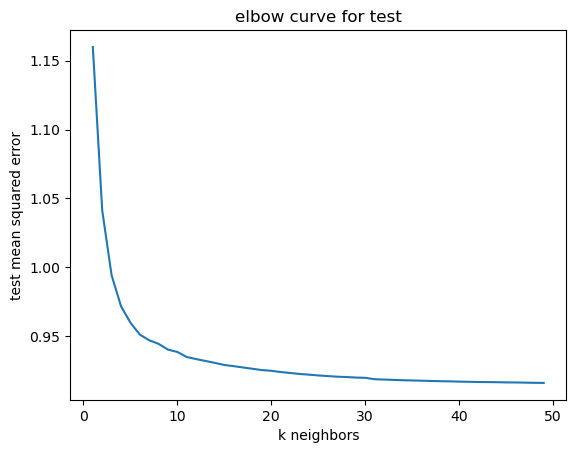

In [25]:
#plotting the curves
plt.plot(k,test)
plt.xlabel("k neighbors")
plt.ylabel("test mean squared error")
plt.title("elbow curve for test")

In [34]:
#creating instance of KNN
reg = KNN(n_neighbors = 5)
#fitting the model
reg.fit(train_x,train_y)
#predicting over the train set and calculating F1
test_predict = reg.predict(test_x)
k= sqrt(mse(test_predict,test_y))
print("test rmse ", k)

test rmse  0.9600036193785295


In [27]:
#The best value of k is 10

In [28]:
knn_train_score = reg.score(train_x,train_y)
knn_train_score*100

23.98916565151411

In [29]:
knn_test_score = reg.score(test_x,test_y)
knn_test_score*100

-8.35579351764113

In [30]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store knn_test_score

Stored 'knn_test_score' (float64)


In [31]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store knn_train_score

Stored 'knn_train_score' (float64)


In [35]:
# Conclusions
#1. The Test RMSE is 0.9387669444953632 when we took the value of k as 10

#2. We used Elbow method in order to determine the value of k 

#3. On using Elbow method we found that at k = 10 the test RMSE is lesser than the RMSE at K =5 i.e test rmse   0.9600036193785295 when K = 5

#4. The train score is 23.98916565151411
#5. The test score is -8.35579351764113 which is not pereferd



In [36]:
custom_df=sample_df

In [37]:
sample_df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration_hour    float64
dtype: object

In [38]:
#seperate features and target
features = sample_df.drop(["id","vendor_id","trip_duration_hour","pickup_datetime","dropoff_datetime"],axis = 1)
target = sample_df["trip_duration_hour"]

In [39]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','trip_duration_hour','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
191457,-74.000938,40.731819,-73.955307,40.782749,0,0,0,0,1,0
360147,-73.978882,40.772640,-74.004417,40.733490,0,0,0,0,0,1
54070,-73.949448,40.784821,-74.005051,40.709190,1,0,0,0,0,0
496795,-73.984779,40.742680,-73.909271,40.770222,0,1,0,0,0,0
521780,-73.993576,40.741501,-74.001053,40.718555,1,0,0,0,0,0


In [40]:
df1.shape

(100000, 10)

In [41]:
#seperate features and target
x = df1
y = sample_df["trip_duration_hour"]
x.shape,y.shape

((100000, 10), (100000,))

In [42]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [43]:
# Linear Regression model

In [52]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse

In [53]:
#creating an instance of LR
lr = LR()
#fitting the model
lr.fit(train_x,train_y)

LinearRegression()

In [54]:
#predicting the train values and finding the RMSE
train_predict = lr.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  0.7808824222699722


In [55]:
#predicting the test values and finding the RMSE
test_predict = lr.predict(test_x)
k = sqrt(mse(test_predict,test_y))
print("testing rmse ",k)

testing rmse  0.9230511950477114


In [56]:
#computing the coefficients of above model
lr.coef_

array([ 1.41350094e+00, -6.46827679e-01,  6.54409685e-01, -4.50090127e-01,
       -2.99074649e-02,  9.59884251e-04,  3.38263639e-02, -8.11355037e-03,
        1.88818433e-02, -1.56470762e-02])

In [57]:
# plotting the coefficients

Text(0.5, 1.0, 'coefficient plot')

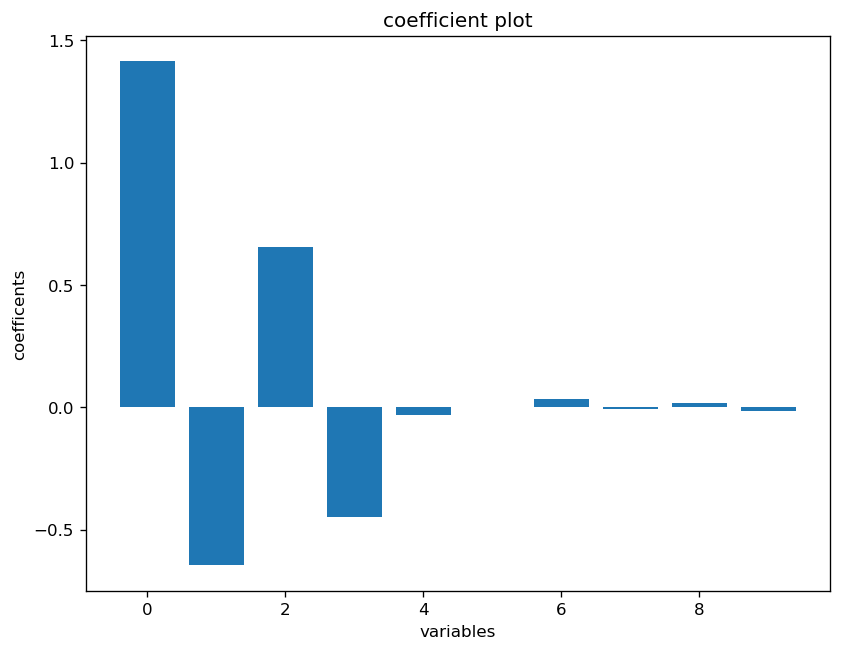

In [58]:
plt.figure(figsize=(8,6),dpi=120,facecolor="w",edgecolor="b")
x = range(len(train_x.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("variables")
plt.ylabel("coefficents")
plt.title("coefficient plot")

In [59]:
#calculating the residuals 
residuals = pd.DataFrame({
    "fitted_values":test_y,
    "predicted_values":test_predict
})
residuals["residuals"]=residuals["fitted_values"]-residuals["predicted_values"]
residuals.head()

,fitted_values,predicted_values,residuals
175159,0.380278,0.235392,0.144886
229931,0.188333,0.328744,-0.140411
186470,0.453889,0.228237,0.225652
396261,0.101389,0.214704,-0.113316
634962,0.215833,0.251328,-0.035494


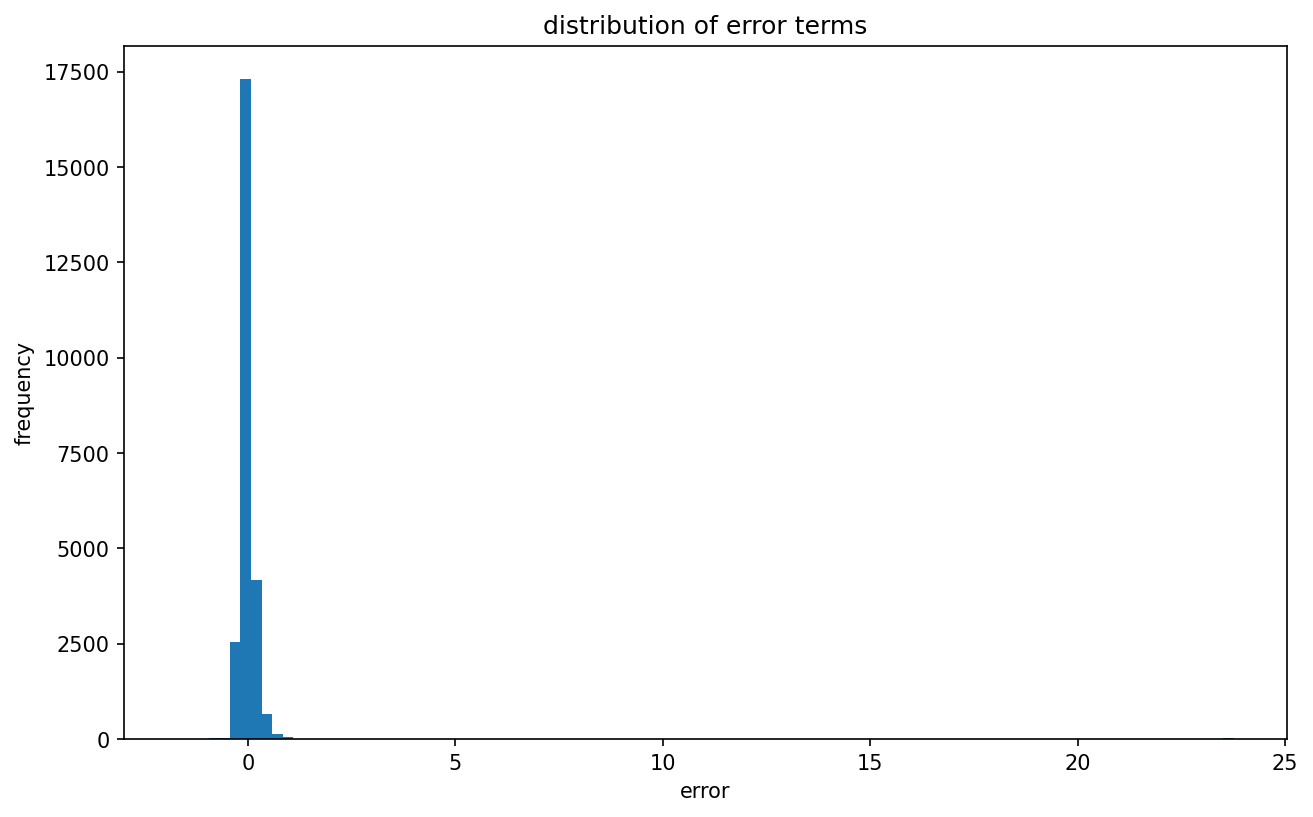

In [60]:
plt.figure(figsize=(10,6),dpi=150,facecolor="w",edgecolor="b")
plt.hist(residuals.residuals,bins=100)
plt.xlabel("error")
plt.ylabel("frequency")
plt.title("distribution of error terms")
plt.show()

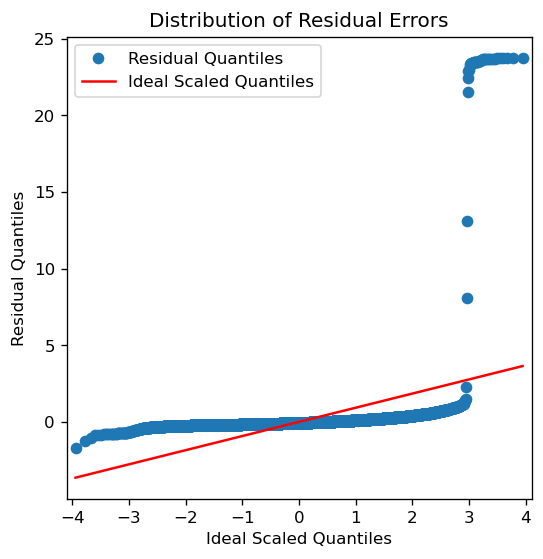

In [61]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [62]:
#calculating the train score 

linear_train_score = lr.score(train_x,train_y)
linear_train_score*100

0.974192740138502

In [63]:
#calculating the test score

linear_test_score = lr.score(test_x,test_y)
linear_test_score*100

-0.17468233800463917

In [64]:
#storing the value of test score which can be further used in other files for plotting the bar graph
%store linear_test_score

Stored 'linear_test_score' (float64)


In [65]:
#storing the value of train score which can be further used in other files for plotting the bar graph
%store linear_train_score

Stored 'linear_train_score' (float64)


In [66]:
# conclusions

#1. The training and test RMSE has a huge difference as the training rmse is 0.7808824222699722 and testing rmse is 0.9230511950477114
#2. On computing the coefficients we observed that there are some negative values as well
#3. On plotting the qqplot we see that the residual quantile line doesn't fit over all ideal scaled quantiles
#4. The train score of linear model is very low  0.974192740138502
#5. The test score of linear model is  very low -0.17468233800463917

In [67]:
sample_df=custom_df

In [68]:
sample_df.dtypes.shape

(11,)

In [69]:
df1 = pd.concat([sample_df, pd.get_dummies(sample_df[['passenger_count']].astype('str'))], axis=1)
try:
    df1.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag','passenger_count'], axis=1, inplace=True)
except KeyError:
    pass

df1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration_hour,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
191457,-74.000938,40.731819,-73.955307,40.782749,0.254444,0,0,0,0,1,0
360147,-73.978882,40.772640,-74.004417,40.733490,0.180278,0,0,0,0,0,1
54070,-73.949448,40.784821,-74.005051,40.709190,0.330556,1,0,0,0,0,0
496795,-73.984779,40.742680,-73.909271,40.770222,0.561667,0,1,0,0,0,0
521780,-73.993576,40.741501,-74.001053,40.718555,0.188056,1,0,0,0,0,0


In [70]:
x = df1.drop(["trip_duration_hour"],axis = 1)
y = df1["trip_duration_hour"]

In [71]:
y.shape

(100000,)

In [72]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=56)

In [73]:
# Decision Tree model

In [74]:
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [77]:
from math import sqrt
train_predict = regressor.predict(train_x)
k = sqrt(mse(train_predict,train_y))
print("training rmse ",k)

training rmse  6.0350911428809984e-05


In [76]:
from math import sqrt
test_predict = regressor.predict(test_x)
k1 = sqrt(mse(test_predict,test_y))
print("testing rmse ",k1)

testing rmse  0.00010453084487778811


In [78]:
# To interpret the variable importance.

In [79]:
x.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_count_4', 'passenger_count_5',
       'passenger_count_6'],
      dtype='object')

In [80]:
pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 5.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


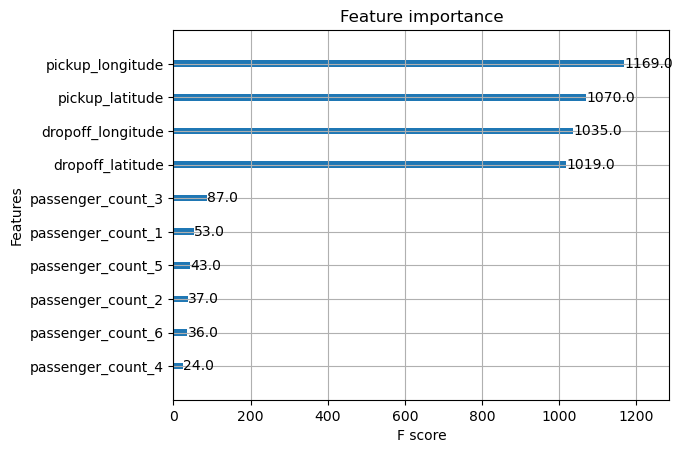

In [81]:
#Using XGBoost in order to interpret the variable importance
from xgboost import XGBRegressor
from xgboost import plot_importance
import matplotlib.pyplot as plt
model = XGBRegressor()
model.fit(x,y)
plot_importance(model)
plt.show()

In [82]:
#From the above graph we can draw an insight that the varaible "dropoff_latitude" has more impact on the trip duration variable followed by "pickup_longitude" then "pickup_latitude"

In [83]:
#calculating the train score of decision tree model
decision_train_score = regressor.score(train_x,train_y)
decision_train_score*100

99.9999994085136

In [84]:
#calculating the test score of decision tree model
decision_test_score = regressor.score(test_x,test_y)
decision_test_score*100

99.99999871531895

In [85]:
#storing the test score to use it in other file
%store decision_test_score

Stored 'decision_test_score' (float64)


In [86]:
#storing the train score to use it in other file
%store decision_train_score

Stored 'decision_train_score' (float64)


In [87]:
# Conclusions

#1.The training RMSE of decision model is  0.000060350911428809984. Where as the testing RMSE is 0.00010453084487778811. They are almost equal so its the best fit

#2.The train score and test score is 99.99 so we can consider that decision tree is the best model for predicting the trip duration variable.


In [88]:
# BAR plot

In [89]:
decision_train_score,linear_train_score,knn_train_score

(0.999999994085136, 0.00974192740138502, 0.2398916565151411)

In [90]:
#assining the train score values in x,y
x=["decision_train_score","linear_train_score","knn_train_score"]
y=[0.9999996442282492, 0.005868613774166032, 0.22451293627095015]

In [91]:
knn_test_score, linear_test_score,decision_test_score

(-0.0835579351764113, -0.0017468233800463917, 0.9999999871531895)

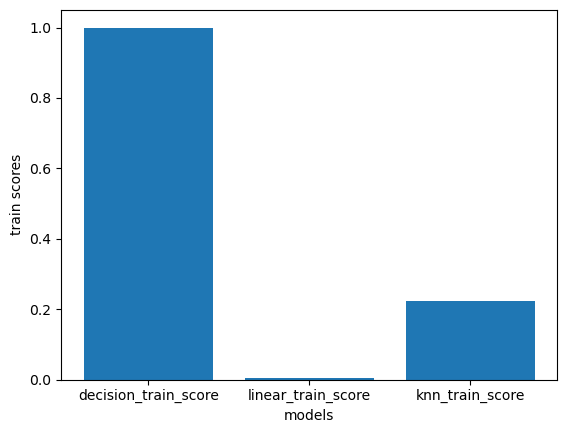

In [92]:
plt.figure(dpi=100)
plt.bar(x,y)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [93]:
#assining the test score value in x1,y1
x1=["knn_test_score","linear_test_score","decision_test_score"]
y1=[-0.16425004050105008,0.00719197085905432,0.9999989502319949]

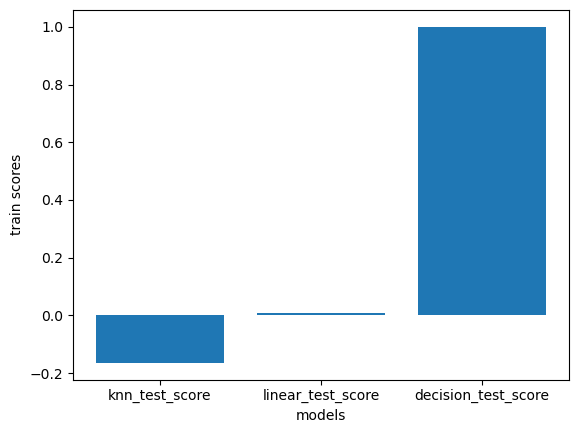

In [94]:
plt.figure(dpi=100)
plt.bar(x1,y1)
plt.xlabel("models")
plt.ylabel("train scores")
plt.show()

In [95]:
# from above graph we can see that the best model among KNN LR and DT(decision tree) the best one is DT in train score